In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from functools import reduce

matplotlib.rcParams.update({ 
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False
})

In [2]:
from glob import glob
import os

def loadFile(file):
    name = os.path.splitext(os.path.split(file)[-1])[0]
    df = pd.read_csv(file, index_col="pow")
    return (name, df)


dfs = dict([loadFile(file) for file in glob("results/*.csv")])

def getDataFrameMap(suffix: str):
    sfx = "_" + suffix
    return { k.replace(sfx, ""): v for k, v in dfs.items() if k.endswith(sfx) }

def constructFrame(suffix: str, type: str):
    dfMap = getDataFrameMap(suffix)
    df = pd.concat([v[type].rename(k) for k, v in dfMap.items()], axis=1)

    ranks = [x for x in df.columns]
    def getRank(x):
        if x == "std::map": return 1
        elif "tnl" in x and "host" not in x: return 2
        elif "owg" in x or "palm" in x: return 3
        else: return 4

    ranks.sort(key=lambda x: (getRank(x), x))
    return df[ranks]

def getLatexName(name: str):
    if "std" in name: return "STL"
    elif "tlx" in name: return "TLX"
    elif name == "tnl::b-link": return "TNL$^{link}$"
    elif name == "tnl::b+tree": return "TNL$^+$"
    elif name == "tnl::host": return "TNL$^{host}$"
    else: return name.upper()

def getLatexDf(df: pd.DataFrame):
    return df.rename(columns=dict([(col, getLatexName(col)) for col in df.columns]))

def getLatexPlot(df: pd.DataFrame, **kwargs):
    plot = getLatexDf(df).plot(style=".-", **kwargs)
    fig = plot.get_figure()
    fig.set_size_inches(w=5.10686, h=2.9)

    plot.legend(
        loc='lower left',
        bbox_transform=fig.transFigure,
        mode="expand",
        ncol=4,
        bbox_to_anchor=(0.0, -0.23, 0.98, 1),
        frameon=False
    )
    plot.set_xlabel("Number of items")
    plot.set_xscale("log", base=2)

    plot.set_ylabel("Operations per second")
    plot.set_yscale("log", base=10)

    plot.grid(color="lightgray", linestyle="-.", linewidth=0.7)
    return fig

def saveLatexPlot(plot, name):
    return plot.savefig("../components/figure/" + name, bbox_inches="tight")

def transformThroughput(df: pd.DataFrame):
    powSeries = pd.Series([1 << i for i in df.index])
    powDf = pd.concat([powSeries for x in range(len(df.columns))], axis=1, keys=df.columns).set_index(df.index) 
    thrDf = powDf / df * 1000
    return thrDf.set_index(powSeries)

def transformResults(df: pd.DataFrame):
    return pd.concat([(df["std::map"] / df[x]).rename(x) if x != "std::map" else df[x] for x in df.columns], axis=1)



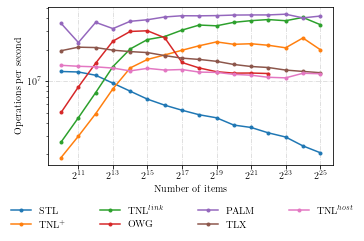

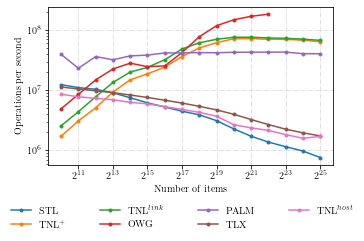

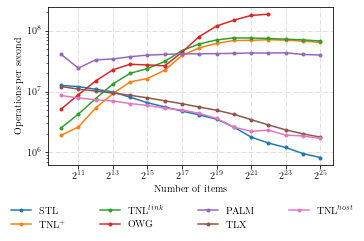

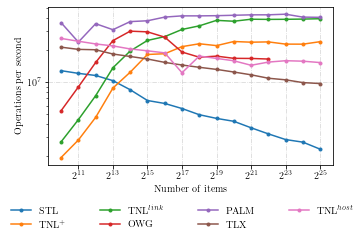

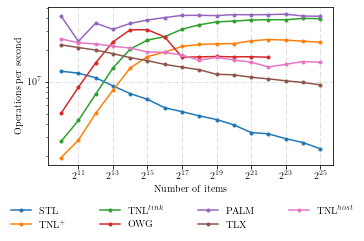

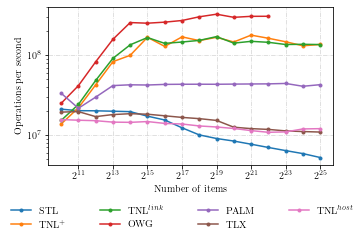

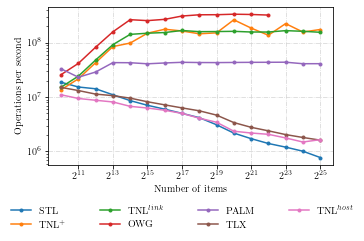

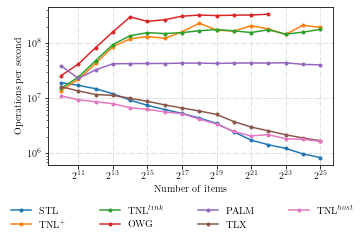

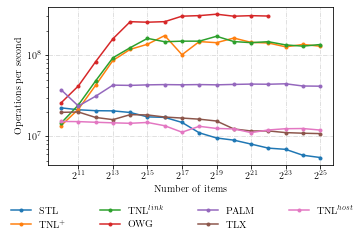

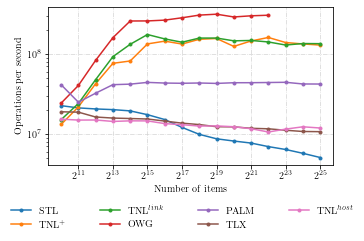

In [3]:
for suffix in ("insert", "query"):
    datasets = set(reduce(lambda x, y: x + y, [v.columns.tolist() for k, v in getDataFrameMap("insert").items()]))

    for dataset in datasets:
        plot = getLatexPlot(transformThroughput(constructFrame(suffix, dataset)));
        saveLatexPlot(plot, "{}-{}.pgf".format(suffix, dataset))



In [4]:
for suffix in ("insert", "query"):
    datasets = set(reduce(lambda x, y: x + y, [v.columns.tolist() for k, v in getDataFrameMap("insert").items()]))

    for dataset in datasets:
        df = getLatexDf(transformResults(constructFrame(suffix, dataset)))
        
        print("\n{} - {}".format(suffix, dataset))
        display(df)



insert - decreasing


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0826,0.150889,0.212077,0.406356,2.878049,1.579350,1.145631
11,0.1670,0.243844,0.365958,0.719738,1.910755,1.725207,1.133741
12,0.3588,0.429400,0.682399,1.303841,3.197861,1.838115,1.202816
13,0.8545,0.883917,1.440337,2.521065,3.321026,2.066505,1.393737
14,2.0375,1.666449,2.529312,3.718459,4.646522,2.387789,1.562380
15,4.8573,2.395685,3.709278,4.497333,5.732680,2.785309,1.968670
16,11.0889,3.017963,4.526617,4.401667,6.955777,2.974331,2.164997
17,24.7816,3.738728,5.820884,2.858082,7.985049,3.144035,2.447227
18,54.7655,4.562917,7.190499,2.797527,8.807716,3.375835,2.555398



insert - shuffle


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0827,0.138550,0.207442,0.397822,3.193050,0.913812,0.692630
11,0.1851,0.278953,0.396919,0.772022,2.098639,0.950205,0.704070
12,0.3947,0.492115,0.752000,1.432595,3.505329,0.943130,0.705830
13,0.9029,1.027929,1.485096,2.487273,3.540784,1.005121,0.767511
14,2.1829,1.988613,2.678977,3.762998,4.967911,1.111060,0.838062
15,5.3125,3.041032,3.894366,3.999774,6.236793,1.228977,0.961608
16,12.4293,4.595989,6.101797,4.817782,7.920788,1.294301,1.011894
17,29.2797,8.118524,10.864412,9.468828,9.349459,1.366939,1.070568
18,67.2148,12.980967,15.802902,19.932978,10.852825,1.384433,1.098701



insert - gaussian


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0811,0.151723,0.200663,0.409088,3.244000,0.959763,0.684966
11,0.1695,0.217513,0.353327,0.735993,2.013064,0.909335,0.650922
12,0.3745,0.490903,0.701559,1.368561,3.049674,0.933217,0.672835
13,0.8285,0.942162,1.353710,2.311005,3.469430,0.956477,0.707696
14,2.0296,1.791461,2.475025,3.483897,4.644394,1.077168,0.788562
15,4.9846,2.498860,3.640733,4.175126,6.050006,1.201601,0.902909
16,11.7134,4.019284,5.607529,4.746226,7.308542,1.263786,0.953511
17,27.3962,8.232031,9.868948,9.294756,8.698035,1.320770,1.043569
18,63.3447,12.647742,14.651831,19.426837,10.131424,1.347075,1.059646



insert - almostSorted


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0800,0.151579,0.213236,0.419041,2.836879,1.666667,2.015113
11,0.1696,0.235023,0.365893,0.744768,1.974389,1.684211,2.009479
12,0.3552,0.402568,0.644363,1.326294,3.080659,1.748892,1.984358
13,0.7949,0.851756,1.323281,2.387790,3.025885,1.783887,2.127677
14,1.9366,1.463861,2.319943,3.571020,4.395370,2.059994,2.426209
15,4.8946,2.718935,3.689054,4.444707,5.655228,2.464924,2.944120
16,10.4373,2.945835,4.273344,4.224499,6.531886,2.440846,3.002071
17,23.3042,3.838420,5.572541,3.411346,7.488496,2.573912,2.175990
18,53.3170,4.671807,6.895718,3.488396,8.566769,2.801705,3.574939



insert - increasing


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0815,0.152571,0.217307,0.400881,3.326531,1.775599,2.022333
11,0.1699,0.232013,0.356410,0.734395,1.998824,1.747942,1.939498
12,0.3761,0.460835,0.699511,1.383422,3.290464,1.830170,2.091769
13,0.8962,0.907879,1.474641,2.604286,3.425841,2.015744,2.370272
14,2.1226,1.746292,2.638297,4.014822,4.615351,2.188247,2.697420
15,4.8079,2.539321,3.635436,4.555179,5.627882,2.323330,2.807041
16,11.5680,3.361169,4.701789,4.675677,7.141622,2.573240,3.345286
17,25.1659,4.142835,6.024600,3.280321,8.148787,2.636028,3.427896
18,55.2121,4.745183,7.278464,3.618591,8.942534,2.731906,3.365955



query - decreasing


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0486,0.650428,0.721222,1.182643,1.588235,0.918715,0.739726
11,0.1015,1.085515,1.197567,2.060730,1.072939,0.973154,0.758595
12,0.2038,2.118679,2.404118,4.125372,1.484341,0.844942,0.750921
13,0.4124,4.195150,4.620832,8.014614,2.099796,0.907570,0.729137
14,0.8354,5.106856,6.921235,13.179650,2.174954,0.942251,0.733773
15,1.9045,9.801651,9.740193,14.753844,2.464415,1.058526,0.855302
16,4.2530,8.408063,9.181145,16.977231,2.800975,1.128536,0.905375
17,10.6689,13.898746,11.979815,22.334359,3.527492,1.351554,1.116204
18,26.2033,15.333162,15.418241,30.541472,4.336285,1.601072,1.295666



query - shuffle


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0546,0.730415,0.813740,1.383147,1.766990,0.804124,0.588362
11,0.1334,1.416016,1.583450,2.721649,1.512472,0.860645,0.615030
12,0.2877,3.024092,3.383241,5.825207,2.034653,0.797837,0.615006
13,0.7417,7.702933,8.363025,14.415153,3.903684,0.964123,0.737423
14,1.9005,11.456525,16.555743,30.823451,4.980346,1.110624,0.784650
15,4.6324,21.204409,21.188891,36.123740,5.799925,1.161527,0.891086
16,10.9177,29.534117,25.693845,44.914944,7.079761,1.200182,0.954770
17,26.0742,32.771024,33.446986,61.744626,8.693718,1.260262,0.999157
18,62.5709,34.896934,38.197008,78.074944,10.332563,1.337008,0.978135



query - gaussian


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0532,0.717832,0.789561,1.336952,2.015152,0.844444,0.573276
11,0.1197,1.282793,1.413477,2.441821,1.335938,0.792191,0.548328
12,0.2750,2.888655,3.245742,5.598534,2.207063,0.783476,0.578460
13,0.6792,7.182741,7.844260,13.322245,3.495625,0.935151,0.659674
14,1.7762,13.041882,14.863847,32.604705,4.621910,1.081137,0.727802
15,4.4198,17.847106,20.958243,33.605535,5.769974,1.184488,0.847241
16,10.5115,19.661482,24.017612,42.835545,6.860397,1.215090,0.903741
17,24.7380,30.425949,29.362542,58.490428,8.204975,1.253674,0.986942
18,59.9719,52.861966,38.548794,74.235603,9.949549,1.343574,0.955239



query - almostSorted


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0458,0.604668,0.649476,1.154141,1.671533,0.880769,0.679525
11,0.0966,1.014365,1.145071,1.966869,1.111623,0.937864,0.713969
12,0.1985,2.062209,2.335514,4.028526,1.508359,0.825021,0.719985
13,0.3990,4.189768,4.519956,7.752751,2.078125,0.779754,0.712246
14,0.8354,6.009726,6.300388,13.188971,2.159214,0.939919,0.735646
15,1.8927,7.870509,9.300417,14.716814,2.482555,1.056961,0.853413
16,3.8399,10.214239,8.575302,15.173512,2.538273,1.009597,0.788302
17,8.8639,6.842808,10.057322,20.461166,2.912403,1.132217,0.757857
18,23.8167,13.356907,13.509955,27.917175,3.937295,1.473496,1.203186



query - increasing


,STL,TNL$^+$,TNL$^{link}$,OWG,PALM,TLX,TNL$^{host}$
pow,,,,,,,
10,0.0453,0.582322,0.668378,1.074968,1.826613,0.838889,0.678144
11,0.0966,1.029236,1.134442,1.906378,1.178049,0.884615,0.704595
12,0.1991,2.068442,2.324197,4.047538,1.573913,0.792911,0.727705
13,0.4060,3.787313,4.588110,7.919788,2.049470,0.784087,0.711906
14,0.8423,4.200746,6.786940,13.267074,2.158084,0.803185,0.751048
15,1.8785,7.653602,10.022569,14.823320,2.530989,0.882878,0.836190
16,4.3205,9.528945,10.164471,17.442541,2.855774,0.957091,0.889816
17,10.8293,10.986094,11.580529,23.387699,3.555603,1.129594,1.080456
18,26.4528,15.397260,15.929856,30.847343,4.378443,1.324236,1.268932
